In [46]:
import pandahouse
import numpy as np
import pandas as pd
import hashlib
import seaborn as sns
import scipy.stats as stats

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<font size="12"> Тест по метрике линеаризованных лайков </font>

<font size='6' color='MediumPurple'> Между группами 1 и 2   </font>

In [48]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
'database':'simulator_20230820',
'user':'student',
'password':'dpo_python_2020'
}

In [49]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-07-30' and '2023-08-05'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)

In [50]:
control_ctr=df[df['exp_group']==2].likes.sum()/df[df['exp_group']==2].views.sum()

likes_num_1=df[df['exp_group']==1].likes.to_numpy()
likes_num_2=df[df['exp_group']==2].likes.to_numpy()

views_num_1=df[df['exp_group']==1].views.to_numpy()
views_num_2=df[df['exp_group']==2].views.to_numpy()

linearized_likes_1=likes_num_1-control_ctr*views_num_1

linearized_likes_2=likes_num_2-control_ctr*views_num_2

<Axes: ylabel='Count'>

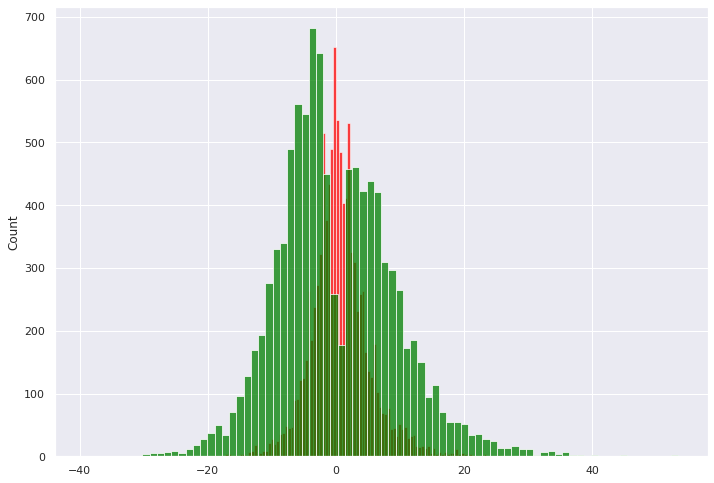

In [51]:
sns.histplot(linearized_likes_1,color="red")
sns.histplot(linearized_likes_2,color="green")

In [52]:
#Тест по метрике линеаризованных лайков
stats.ttest_ind(linearized_likes_1,linearized_likes_2,equal_var=False)

Ttest_indResult(statistic=5.9970015685163105, pvalue=2.057830534123999e-09)

In [60]:
#Т-тест
stats.ttest_ind(df[df['exp_group']==1].ctr,df[df['exp_group']==2].ctr,equal_var=False)

Ttest_indResult(statistic=0.4051491913112757, pvalue=0.685373331140751)

<font size='6' color='DarkSlateBlue'> Тест по метрике линеаризованных лайков показал большую чувствительность. p-value меньше 0.05, т.е. различия ctr в группах имеются. p-value стал меньше по сравнению с обычным t-тестом   </font>

<font size='8'> ------------------------------------------ </font>

<font size='6' color='MediumPurple'> Между группами 0 и 3   </font>

In [54]:
q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-07-30' and '2023-08-05'
    and exp_group in (0,3)
GROUP BY exp_group, user_id
"""

df2 = pandahouse.read_clickhouse(q, connection=connection)

In [55]:
control_ctr=df2[df2['exp_group']==3].likes.sum()/df2[df2['exp_group']==3].views.sum()

likes_num_0=df2[df2['exp_group']==0].likes.to_numpy()
likes_num_3=df2[df2['exp_group']==3].likes.to_numpy()

views_num_0=df2[df2['exp_group']==0].views.to_numpy()
views_num_3=df2[df2['exp_group']==3].views.to_numpy()

linearized_likes_0=likes_num_0-control_ctr*views_num_0
linearized_likes_3=likes_num_3-control_ctr*views_num_3

Тест по метрике линеаризованных лайков

<Axes: ylabel='Count'>

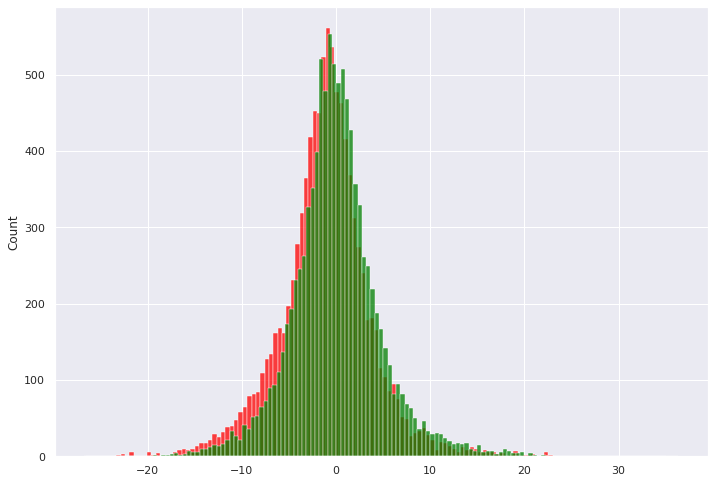

In [56]:
sns.histplot(linearized_likes_0,color="red")
sns.histplot(linearized_likes_3,color="green")

In [57]:
stats.ttest_ind(linearized_likes_0,linearized_likes_3,equal_var=False)

Ttest_indResult(statistic=-15.968566174822877, pvalue=4.788878529844612e-57)

Т-тест

<Axes: xlabel='ctr', ylabel='Count'>

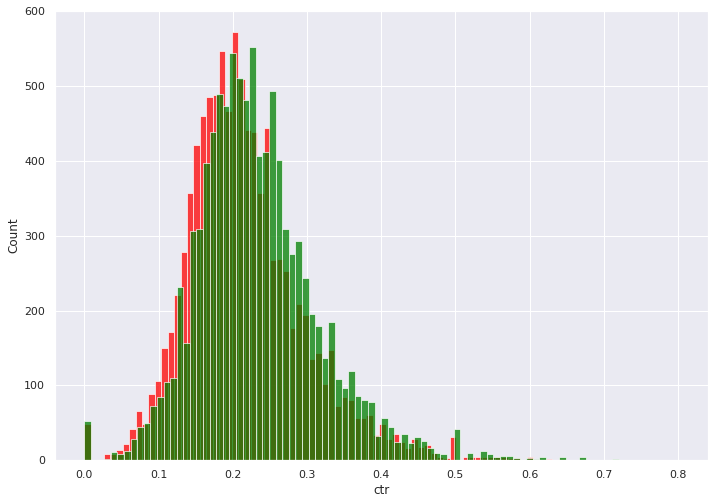

In [58]:
sns.histplot(df2[df2['exp_group']==0].ctr,color="red")
sns.histplot(df2[df2['exp_group']==3].ctr,color="green")

In [59]:
stats.ttest_ind(df2[df2['exp_group']==0].ctr,df2[df2['exp_group']==3].ctr,equal_var=False)

Ttest_indResult(statistic=-13.935320516755773, pvalue=6.216047483062228e-44)

<font size='6' color='DarkSlateBlue'> Тест по метрике линеаризованных показал меньшее p_value, отличие видно</font>

p-value Теста по метрике линеаризованных лайков = 4.788878529844612e-57

p-value Т-теста =6.216047483062228e-44